## Recursive Plotting

In [1]:
# Recursive Generation Algorithm
def genTree(n):
    # Return ϵ from first part of +
    if n==0:
        return 'ϵ'

    Bn = binomial(2*n,n)/(n+1) # Counting sequence
    x = RR.random_element(0,1) # Random real in (0,1)

    # Find the size k of the first element in a pair of trees of size n-1
    k = 0
    s = (binomial(2*k,k)/(k+1) * binomial(2*(n-k-1),n-k-1)/(n-k))/Bn
    while x > s:
        k = k+1
        s = s + (binomial(2*k, k)/(k+1) * binomial(2*(n-k-1), n-k-1)/(n-k))/Bn
    
    # Return a tuple from the product
    return ['Z', genTree(k), genTree(n-k-1)]

In [2]:
# Generate tree of size 3
genTree(3)

['Z', 'ϵ', ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ']]

In [3]:
# Generate tree of size 10
genTree(10)

['Z',
 'ϵ',
 ['Z',
  ['Z',
   ['Z',
    ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ'],
    ['Z', 'ϵ', ['Z', ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ'], 'ϵ']]],
   'ϵ'],
  'ϵ']]

In [4]:
# Change code to output 'BinaryTree' data structure
# which we use for plotting with Sage commands
def genTreePlot(n):
    # Return ϵ from first part of +
    if n==0:
        return None

    Bn = binomial(2*n,n)/(n+1) # Counting sequence
    x = RR.random_element(0,1) # Random real in (0,1)

    # Find the size k of the first element in a pair of trees of size n-1
    k = 0
    s = (binomial(2*k,k)/(k+1) * binomial(2*(n-k-1),n-k-1)/(n-k))/Bn
    while x > s:
        k = k+1
        s = s + (binomial(2*k, k)/(k+1) * binomial(2*(n-k-1), n-k-1)/(n-k))/Bn
    
    # Return a tuple from the product
    return BinaryTree([genTreePlot(k), genTreePlot(n-k-1)])

# Code to plot tree (with various plot options set)
def plotTree(BT):
    BT.graph().show(layout='tree',tree_orientation='down',figsize=(10,10),vertex_size=20, fig_tight=False, vertex_labels=False, edge_style='None')

In [5]:
# Can use basic ascii plotter
ascii_art(genTreePlot(10))

  o
   \
    o
     \
    __o__
   /     \
  o       o
 /       / \
o       o   o
 \      
  o     
   \    
    o   

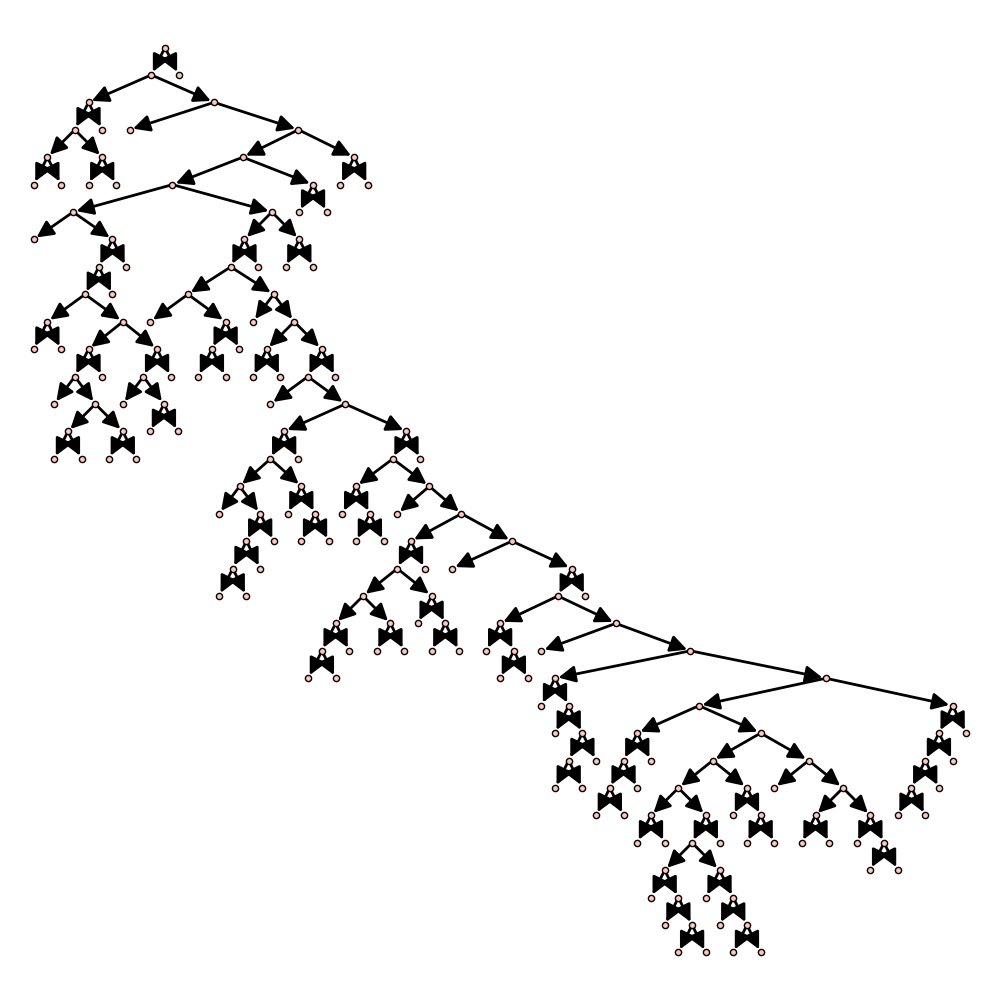

In [7]:
BT = genTreePlot(100) # Generate tree
plotTree(BT) # Plot with correct options

In [12]:
# Recall we proved using bivariate GFs and LIFT that the 
# average number of nodes in a tree of size n -> n/4 as n->infinity
N = 160
pt = [str(genTreePlot(N)).count('[., .]') for k in range(100)]
mean(pt).n()

39.8800000000000

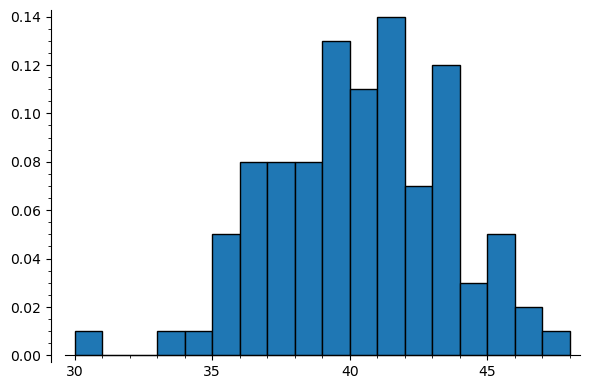

In [13]:
# Can see the number of leaves approaching a normal distribution
plot(histogram(pt,bins=max(pt) - min(pt), density=True, range=[min(pt),max(pt)]))

In [9]:
# Can also get interactive plot by uncommenting the following
# BT.graph().show(method='js') # This not plotted as tree

## Boltzmann Sampling

In [14]:
# Boltzmann Generation Algorithm
def BoltzmannTree(x):
    u = RR.random_element(0,1)
    T = (1-sqrt(1-4*x))/(2*x)

    # Handle +
    if u < 1/T:
        return 'ϵ'
    
    # Handle x
    return ['Z', BoltzmannTree(x), BoltzmannTree(x)]

In [20]:
BoltzmannTree(0.2)

['Z', 'ϵ', ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ']]

In [21]:
[BoltzmannTree(0.2) for k in range(10)]

['ϵ',
 'ϵ',
 'ϵ',
 'ϵ',
 ['Z', 'ϵ', ['Z', 'ϵ', 'ϵ']],
 'ϵ',
 'ϵ',
 ['Z', ['Z', 'ϵ', ['Z', 'ϵ', ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ']]], 'ϵ'],
 'ϵ',
 'ϵ']

In [22]:
BoltzmannTree(0.2499)

['Z',
 ['Z',
  'ϵ',
  ['Z',
   ['Z', 'ϵ', ['Z', ['Z', ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ'], 'ϵ'], 'ϵ']],
   ['Z', 'ϵ', 'ϵ']]],
 ['Z',
  ['Z',
   ['Z',
    'ϵ',
    ['Z',
     ['Z',
      'ϵ',
      ['Z', ['Z', ['Z', 'ϵ', ['Z', 'ϵ', 'ϵ']], 'ϵ'], ['Z', 'ϵ', 'ϵ']]],
     ['Z', 'ϵ', ['Z', 'ϵ', 'ϵ']]]],
   'ϵ'],
  ['Z', 'ϵ', 'ϵ']]]

In [23]:
# Change code to output 'BinaryTree' data structure
# which we use for plotting with Sage commands
def BoltzmannTreePlot(x):
    u = RR.random_element(0,1)
    T = (1-sqrt(1-4*x))/(2*x)

    # Handle sum
    if u < 1/T:
        return BinaryTree(None)
    
    # Handle product
    return BinaryTree([BoltzmannTreePlot(x), BoltzmannTreePlot(x)])

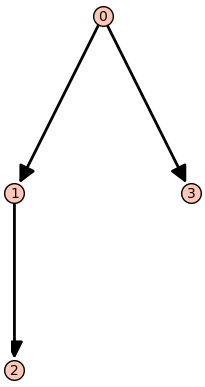

In [33]:
BT = BoltzmannTreePlot(0.249) # Generate tree
BT.show() # Plot with correct options

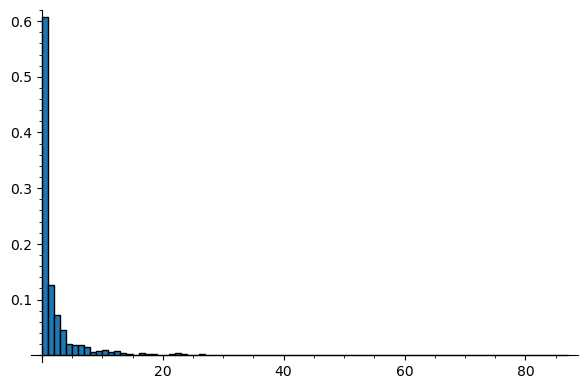

In [34]:
# If we look at the output sizes, we note that most trees
# have small size but occasionally we get a ver large tree 
xx = 0.24
pt = [str(BoltzmannTreePlot(xx)).count('[') for k in range(1000)]
pexp = plot(histogram(pt,bins=max(pt), density=True, range=[min(pt),max(pt)]))
pexp

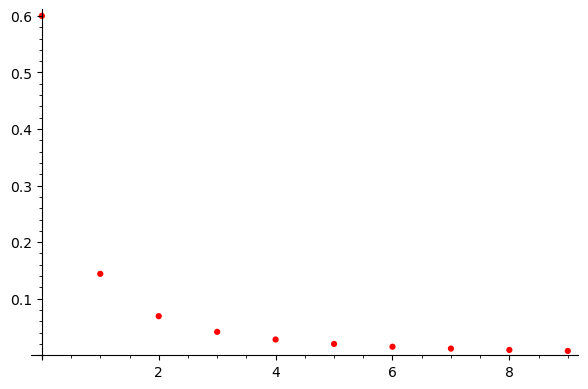

In [35]:
# This experimental data matches the expected number with each size
var('x n')
T = (1-sqrt(1-4*x))/(2*x)
Bn = binomial(2*n,n)/(n+1)
ptheory = point([[k, Bn.subs(n=k) * xx^k/T.subs(x=xx)] for k in range(10)], color = 'red', pointsize=20)
ptheory

## Use pointed class

In [36]:
# Give Boltzmann sampler for pointed binary trees
def BoltzmannPointedTree(x):
    var('z')
    u = RR.random_element(0,1)
    
    T = (1-sqrt(1-4*z))/(2*z)
    pointedT = z*T.diff(z)
    T = T.subs(z=x)
    pointedT = pointedT.subs(z=x)
    
    # handle union
    if u < x*T^2/pointedT:
        return ['Z', BoltzmannTree(x), BoltzmannTree(x)]
    if u < x*T^2/pointedT + x*pointedT*T/pointedT:
        return ['Z', BoltzmannPointedTree(x), BoltzmannTree(x)]
    
    return ['Z', BoltzmannTree(x), BoltzmannPointedTree(x)]

In [37]:
# We more often get trees of large size
BoltzmannPointedTree(0.2)

['Z', ['Z', ['Z', 'ϵ', 'ϵ'], 'ϵ'], ['Z', ['Z', 'ϵ', 'ϵ'], ['Z', 'ϵ', 'ϵ']]]

In [38]:
# Redo function for plotting
def BoltzmannPointedTreePlot(x):
    var('z')
    u = RR.random_element(0,1)
    
    T = (1-sqrt(1-4*z))/(2*z)
    pointedT = z*T.diff(z)
    T = T.subs(z=x)
    pointedT = pointedT.subs(z=x)
    
    # handle union
    if u < x*T^2/pointedT:
        return BinaryTree([BoltzmannTreePlot(x), BoltzmannTreePlot(x)])
    if u < x*T^2/pointedT + x*pointedT*T/pointedT:
        return BinaryTree([BoltzmannPointedTreePlot(x), BoltzmannTreePlot(x)])
    
    return BinaryTree([BoltzmannTreePlot(x), BoltzmannPointedTreePlot(x)])

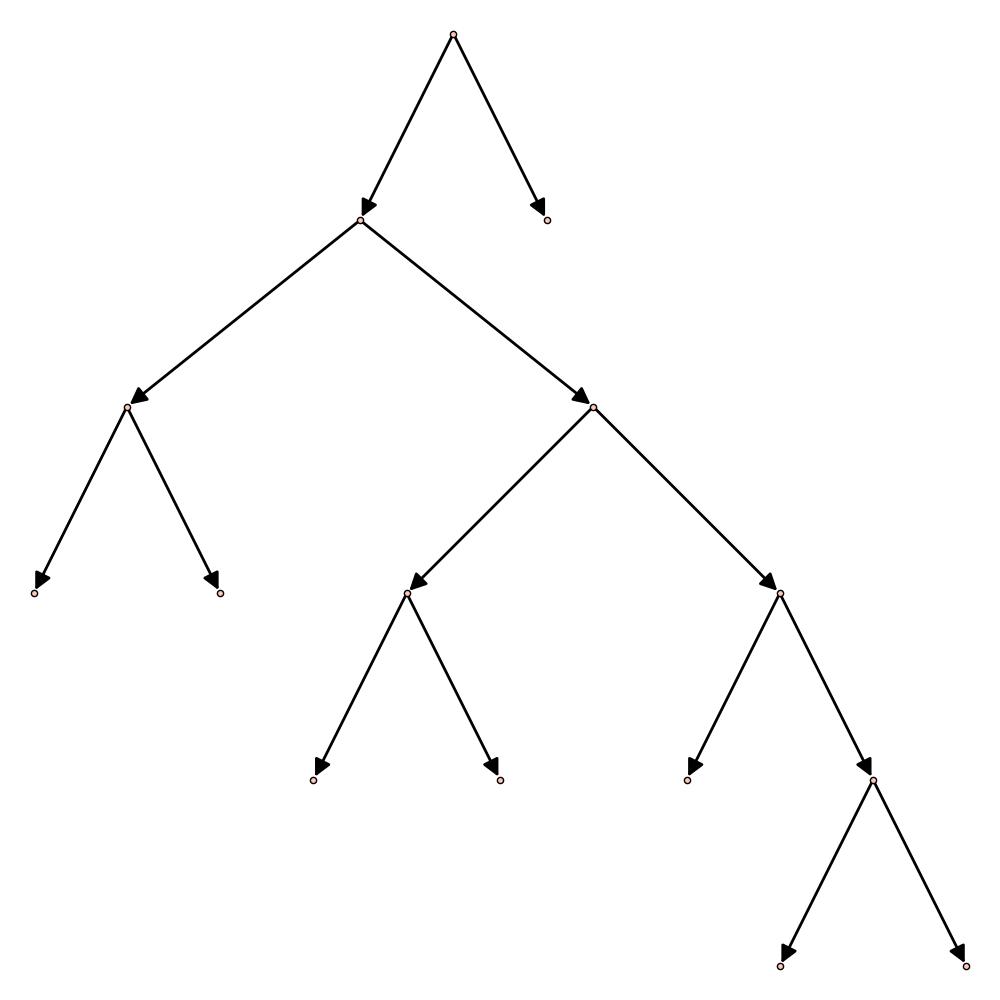

In [42]:
# We more often get trees of large size
plotTree(BoltzmannPointedTreePlot(0.2))

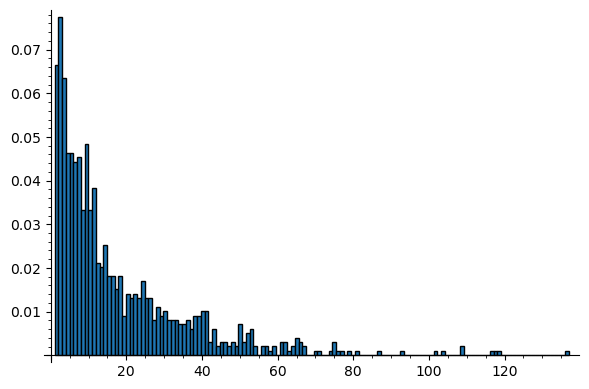

In [43]:
# The distribution is less bunched around x=0
xx = 0.24
pt = [str(BoltzmannPointedTreePlot(xx)).count('[') for k in range(1000)]
plot(histogram(pt,bins=max(pt), density=True, range=[min(pt),max(pt)]))

In [46]:
# Here we define the Boltzmann rejection sampler
# Keep applying Boltzmann until within 10% of desired size

# Helper function
def treeSize(BT): return str(BT).count('[')

# Repeatedly call Boltzmann sampler until tree of right size found
def BoltzmannReject(n):
    T = (1-sqrt(1-4*z))/(2*z)
    pointedT = z*T.diff(z)
    eq = (z*pointedT.diff(z)/pointedT) == 1000
    xx = eq.find_root(0,1/4)
    BT = BoltzmannPointedTreePlot(xx)
    while treeSize(BT)<0.9*n or treeSize(BT)>1.1*n:
        BT = BoltzmannPointedTreePlot(xx)
    return BT

In [47]:
BT = BoltzmannReject(100)
BT

[., [[[[., .], .], [[., [., [[[., [[[[[[[., [[[., [[., .], [[[., .], [., .]], .]]], [[[[[[., [., [., .]]], [., .]], [., .]], [., [., [., [., .]]]]], .], [[[., .], [., [[., .], [., .]]]], [[., .], [., [[., .], .]]]]]], .]], .], [[[., [., [., .]]], [., [[[[[., .], [[., [., .]], [[., .], [., [., [[., .], .]]]]]], [[[[., .], [[[., .], .], .]], .], .]], .], [[., [[[., [., .]], [., .]], .]], .]]]], [., [[[., .], .], .]]]], [., [[., [., [., .]]], [[[[[., .], [[[., .], .], .]], [., [., .]]], .], .]]]], .], .], [., .]]], [., [., [., .]]]], .]]], .]], .]]

In [48]:
treeSize(BT)

110

In [49]:
# Time how long until we get a tree of size ~1000 using Boltzmann
timeit('BoltzmannReject(1000)')

5 loops, best of 3: 546 ms per loop

In [50]:
# Time how long until we get a tree of size 1000 using recursive sampling
timeit('genTreePlot(1000)')

5 loops, best of 3: 1.92 s per loop

In [76]:
# Output an absurdly large random tree
# Trying to plot this monster will probably crash / lock up Sage
BT = BoltzmannReject(10000)
BT

[[[., [[[[., .], [., .]], .], [., [[., [., [., [., [[., .], .]]]]], [[., [[[[[[., [[[[., .], .], .], [., [[., .], [[., .], [[[., .], [., [[[., .], .], [[[[., [[., [., [[., .], [., [[., [., [[[[[[[[[[., .], .], .], .], .], .], [[[., [[., [[., [., .]], [., .]]], [., [[., [[[[[., [., .]], .], [[., .], .]], [., .]], .]], .]]]], [., [[., [., .]], .]]], [[., .], .]]], [[., .], [[., [[[., [[., .], [[., [[[[[., .], [., [., [., .]]]], [[., [., [[., .], [[[., .], .], [[[[[[[[[[., .], [., .]], [., .]], .], [., [[[[., [[[., .], .], [., [[., [., .]], .]]]], .], .], .]]], .], .], .], .], [., [., [., .]]]]]]]], [[., .], .]]], [., .]], [[[[[[[[[., .], [., [[[., .], .], .]]], [., [[[., [., .]], .], [[[[., .], .], .], .]]]], [., [., [[[., [., [., .]]], [., .]], [[[., .], .], .]]]]], [[., [[., [[[., [., .]], .], [., [[., .], [[., .], .]]]]], .]], .]], .], [[[[[., .], .], .], [., .]], .]], [[[[., .], [., [[., .], [., [., .]]]]], .], [., [[., .], [[[., [., [., [., .]]]], .], [., .]]]]]], [., [., [., [[[., 